## 1. Tendencia de Victimas de Secuestros a Nivel Nacional

De acuerdo a los datos abiertos de la fiscalia se pueden agrupar la cantidad de victimas por año de hecho referentes al delito asociado que en nuestro caso es el secuestro  
El objetivo de este notebook es entrenar varios modelos para encontrar la tendencia y predecir 5 años o más a futuro el numero de victimas por año

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import Framework

### 1.1 Secuestros por Año y Linea de Tendencia

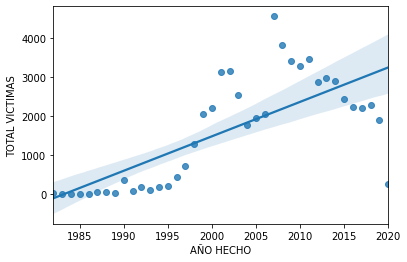

In [2]:
dfSecuestros = pd.read_csv('Datasets/victimasPorAño.csv')
dfSecuestros = dfSecuestros.rename(columns={'ANIO_HECHO':'AÑO HECHO','TOTAL_VICTIMAS':'TOTAL VICTIMAS'})
x,y = dfSecuestros['AÑO HECHO'], dfSecuestros['TOTAL VICTIMAS']
fig,ax = plt.subplots()
sns.regplot(x=x, y=y)
#fig.savefig('Gráficas/tendencia_datos.png',dpi=240)

### 1.2 Top 11 Departamentos con más secuestros

In [3]:
dfSPD =pd.read_csv('Datasets/SecuestrosPorDepartamentos.csv')
dfSPD.sort_values('TOTAL_VICTIMAS',ascending=False).head(11)

,DEPARTAMENTO,TOTAL_VICTIMAS
1,ANTIOQUIA,9212
31,VALLE DEL CAUCA,6621
5,"BOGOTÁ, D. C.",5985
7,BOYACA,3404
9,CAQUETÁ,3127
29,SUCRE,2925
21,META,2590
23,NARIÑO,2534
20,MAGDALENA,2195
25,PUTUMAYO,2195


## 2. Modelos para Predecir Secuestros
### 2.1 DataFrame 5 a 1 años

En este dataframe se representa lo siguiente:
- Input_0 -> Input_4 = Victimas por año en 5 años (ej: 1982 a 1986)
- Output_0 = Victimas en el año siguiente (ej: 1987)

In [4]:
datos_csv = 'Datasets/DataSetVictimasAnios5x1.csv'
df = pd.read_csv(datos_csv)
df

,Input_0,Input_1,Input_2,Input_3,Input_4,Output_0
0,24,1,1,3,11,45
1,1,1,3,11,45,46
2,1,3,11,45,46,42
3,3,11,45,46,42,358
4,11,45,46,42,358,92
5,45,46,42,358,92,171
6,46,42,358,92,171,101
7,42,358,92,171,101,187
8,358,92,171,101,187,209
9,92,171,101,187,209,430


### 2.2 Framework

Desarrollado para ejecutar varios modelos sobre los datos en formato de DataFrame

In [5]:
fw = Framework(
    dataframe  = df,
    start_year = 1982,
    end_year   = 2020,
    inputs     = ['Input_{}'.format(i) for i in range(5)],
    target     = 'Output_0',
    save_dir   = "Modelos/Best"
)

### 2.3 Comparación

Se comparan los resultados de lo que predicen los modelos para los resultados de entrenamiento y prueba, la comparación se hace con modelos encontrados de bajo error cuadrático

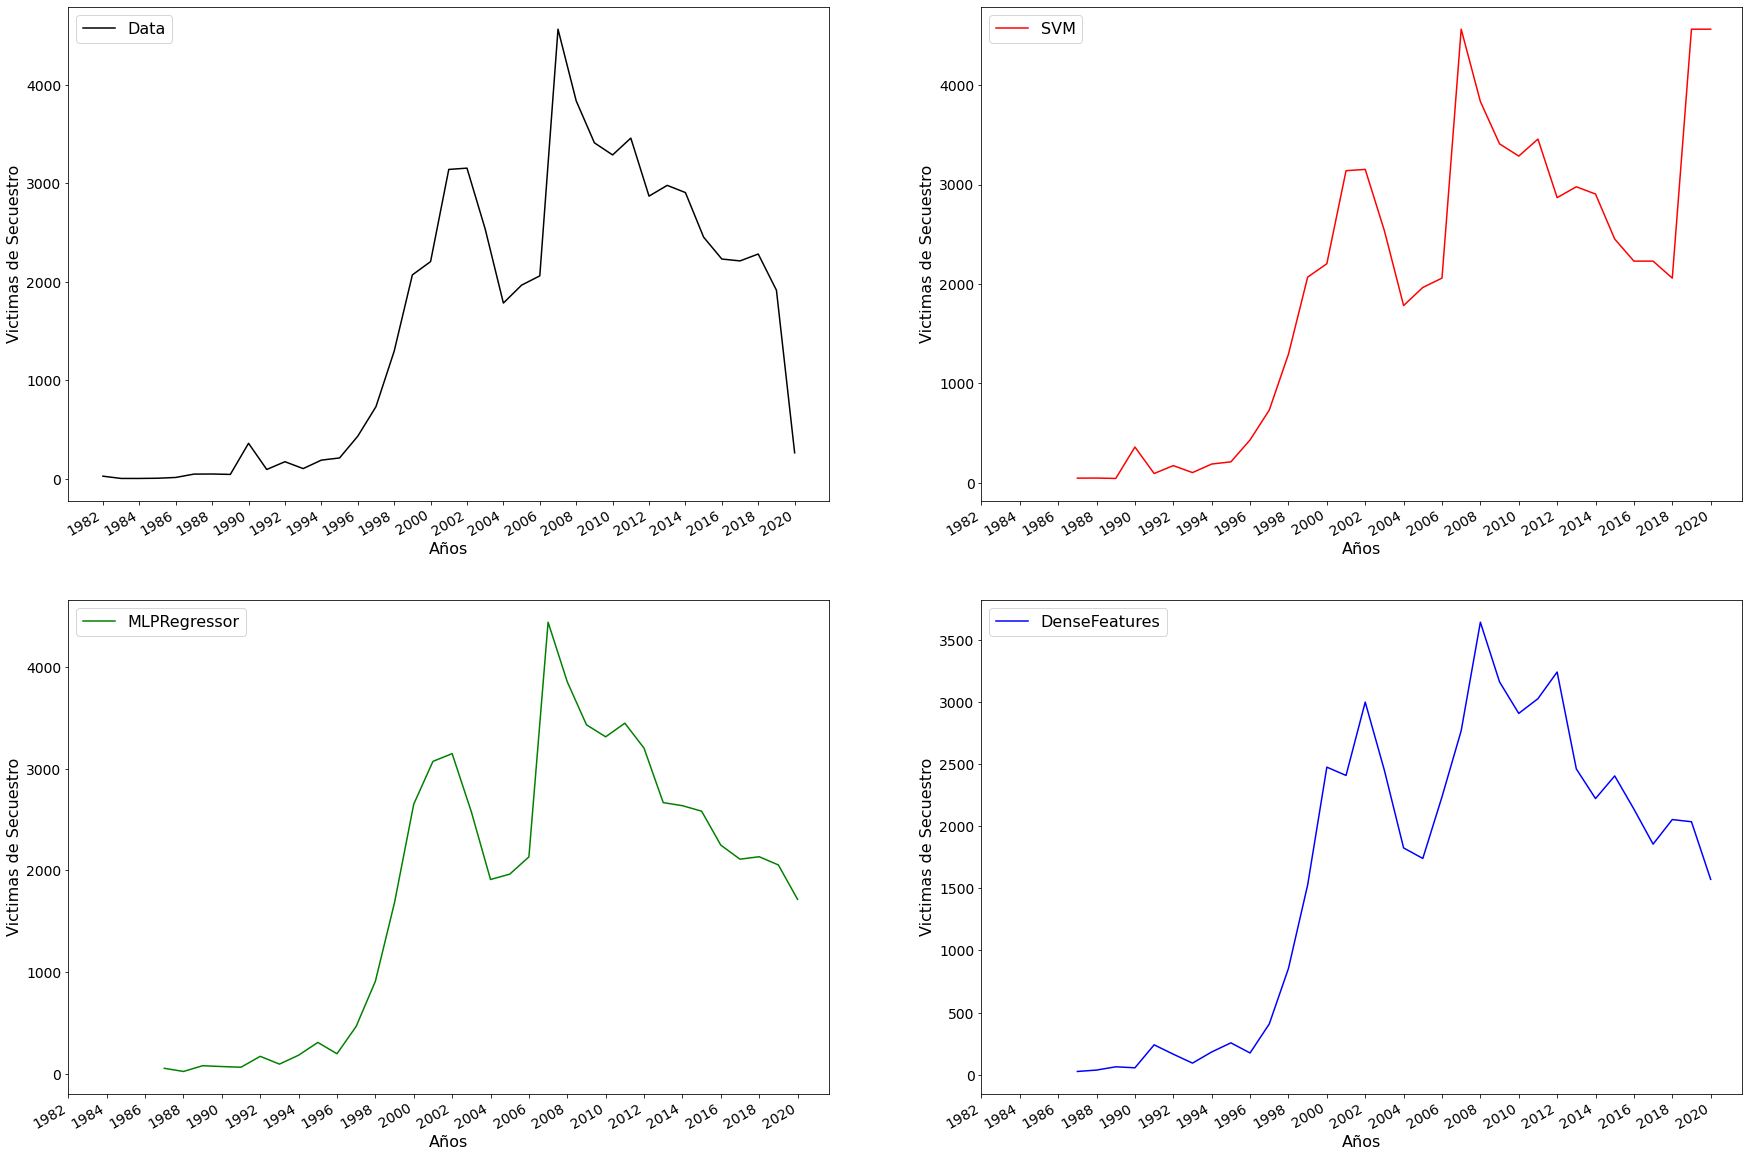

In [6]:
fw.plot_compare(
    #Ubicación de la gráfica
    'Gráficas/predicción_modelos.png',
    mlp_model_name='mlp_188_735', 
    feature_model_name='feature_447_691',
    x_label="Años",
    y_label="Victimas de Secuestro"
)

### 2.4 Predicción

Se realiza la predicción de victimas por secuestro hasta el año 2030 partiendo del año 2005

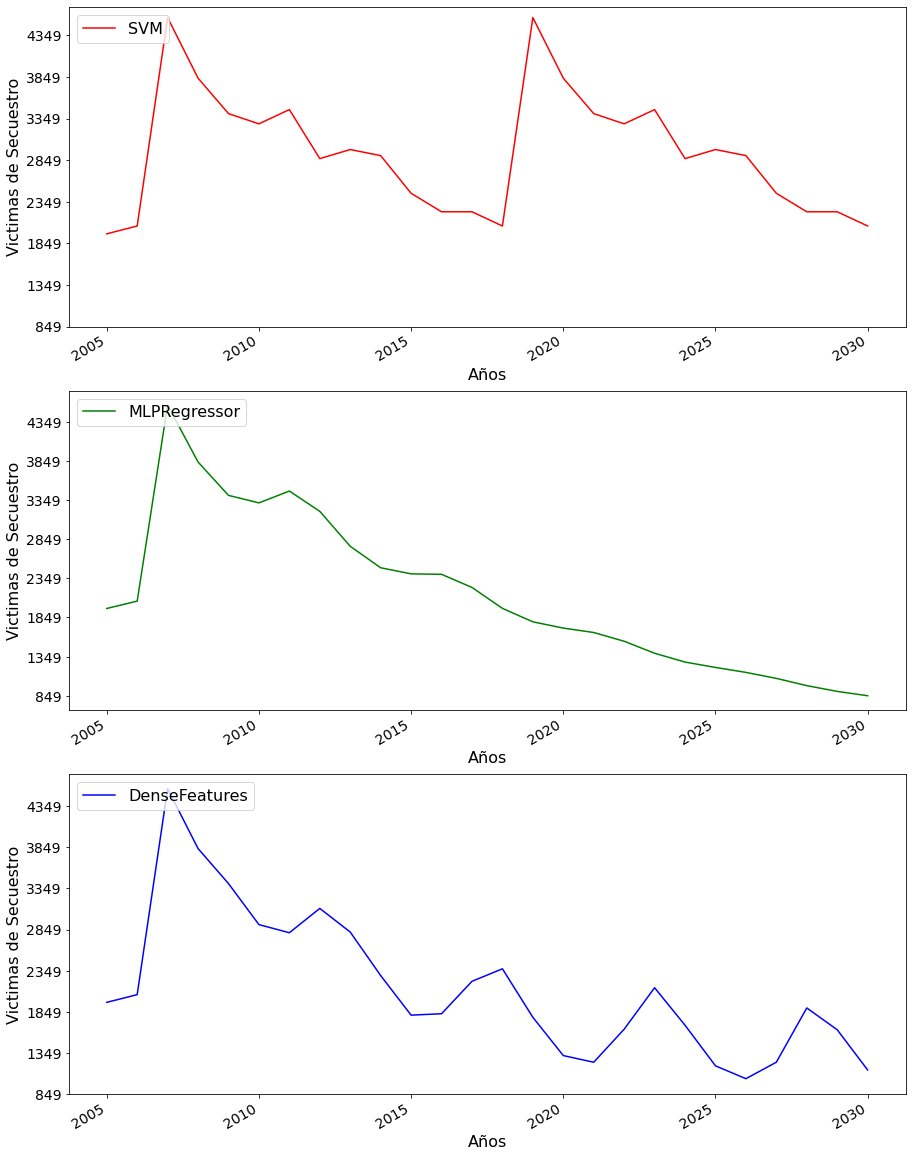

In [7]:
fw.plot_future(
    #Ubicación de la gráfica
    'Gráficas/futuro_2030.png',
    #año objetivo
    end_year=2030,
    mlp_model_name='mlp_188_735', 
    feature_model_name='feature_447_691',
    x_label="Años",
    y_label="Victimas de Secuestro",
    start_offset = 18
)

### 2.4 Red con Caracteristicas Densas
#### RMSE

In [8]:
fw.get_feature_rmse()

(447.3317670876937, 691.4259298662242)

#### Grafico de Dispersión

RMSE. 482.50116005162135


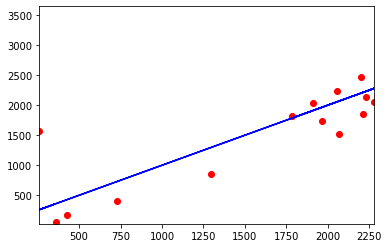

In [9]:
fw.get_feature_scatter()

### 2.5 Red Neuronal con Capas Densas MLPRegressor
#### RMSE

In [10]:
fw.get_mlp_rmse()

(188.0263773849306, 735.1335351076475)

#### Grafico de Dispersión

RMSE. 307.8532316244257


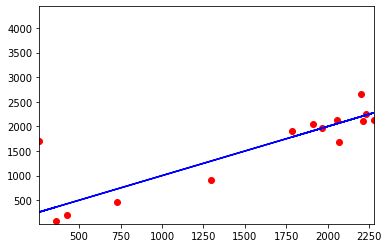

In [11]:
fw.get_mlp_scatter()

### 2.5 Máquina de Soporte Vectorial
#### RMSE

In [12]:
fw.get_svm_rmse()

(0.0, 2529.0635618742367)

### Gráfico de Dispersión

RMSE. 867.4616451938108


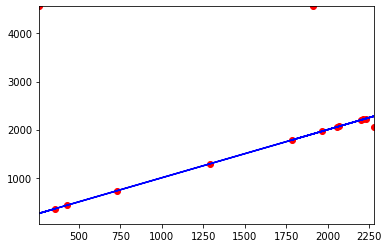

In [13]:
fw.get_svm_scatter()